In [1]:
# !pip install openpyxl

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Train Set

In [3]:
train_data=pd.read_excel("Data_Train.xlsx")
pd.set_option('display.max_columns', None)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
print(train_data.isnull().sum())
train_data.dropna(inplace=True)
print(train_data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


# EDA

In [6]:
train_data['Journey_Date']= pd.to_datetime(train_data.Date_of_Journey, format ="%d/%m/%Y").dt.day
train_data['Journey_Month']= pd.to_datetime(train_data.Date_of_Journey, format ="%d/%m/%Y").dt.month

In [7]:
train_data['Journey_Day'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day_name()

In [8]:
train_data.drop(['Date_of_Journey'], axis=1, inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Sunday
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,Wednesday
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,Sunday
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,Sunday
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,Friday


In [9]:
train_data['Dep_Hour']= pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['Dep_Min']= pd.to_datetime(train_data.Dep_Time).dt.minute
train_data.drop(['Dep_Time'], axis = 1, inplace = True)
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Day,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Sunday,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,Wednesday,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,Sunday,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,Sunday,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,Friday,16,50


In [10]:
train_data['Arr_Hour']= pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arr_Min']= pd.to_datetime(train_data.Arrival_Time).dt.minute
train_data.drop(['Arrival_Time'], axis = 1, inplace = True)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,Sunday,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,Wednesday,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,Sunday,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,Sunday,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,Friday,16,50,21,35


In [11]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [12]:
# duration=list(train_data['Duration'])

# for e in range(len(duration)):
#     if len(duration[e].split()) != 2:
#         if "h" in duration[e]:
#             duration[e]=duration[e].strip() + " 0m"
#         else:
#             duration[e] = " 0h " + duration[e]
# duration_hour = []
# duration_min = []

# for i in range(len(duration)):
#     duration_hour.append(int(duration[i].split(sep = "h")[0]))
#     duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))

# print(duration_hour)
# print(duration_min)

In [13]:
"""Here we extract Hours and minutes from string of pattern '2h 50m'and convert to minutes (int object type)."""

def duration_to_mins(string_element):
    dur_mins= 0
    for substring in string_element.split():
        if 'h' in substring:
            h= int(substring[:-1]) * 60
            dur_mins += h
        if 'm' in substring:
            m = int(substring[:-1])
            dur_mins += m
    return dur_mins

In [14]:
# train_data['Duration_hours']= duration_hour
# train_data['Duration_mins']=duration_min
# train_data.drop(['Duration'], axis=1, inplace = True)
# train_data.head()

train_data["Duration_in_mins"]= train_data.Duration.apply(duration_to_mins)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,Sunday,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,Wednesday,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,Sunday,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,Sunday,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,Friday,16,50,21,35,285


In [15]:
train_data.drop(['Duration'], axis= 1, inplace= True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,Sunday,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,Wednesday,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,Sunday,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,Sunday,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,Friday,16,50,21,35,285


# Handling catagorical data

In [16]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [17]:
# stops=list(train_data['Total_Stops'])

# for i in range (len(stops)):
#     if stops[i]=='non-stop':
#         stops[i]= 0
#     elif stops[i]=='1 stop':
#         stops[i]=1
#     elif stops[i]=='2 stops':
#         stops[i]=2
#     elif stops[i]=='3 stops':
#         stops[i]=3
#     elif stops[i]=='4 stops':
#         stops[i]=4


In [18]:
# train_data['Total_Stops']=stops

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,Sunday,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,Wednesday,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,Sunday,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,Sunday,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,Friday,16,50,21,35,285


In [19]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

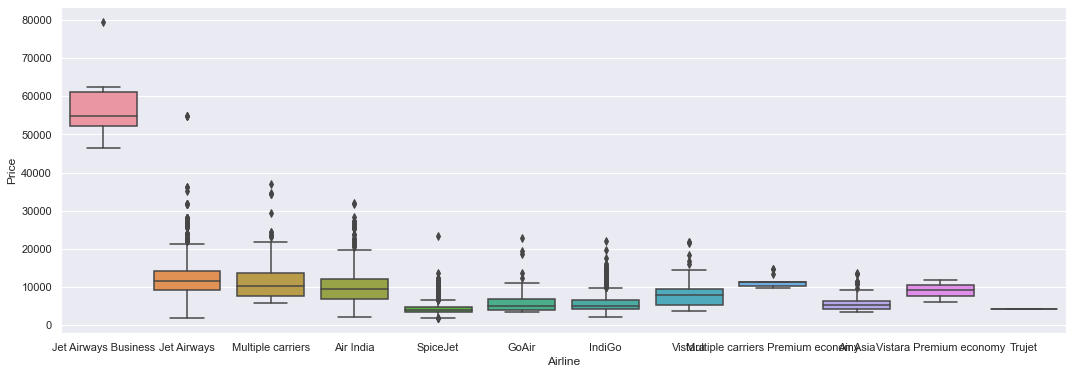

In [20]:
plt.figure(figsize=(18,6))
sns.boxplot(y = "Price", x = "Airline", data=train_data.sort_values("Price", ascending = False))
plt.show()

In [21]:
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [22]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

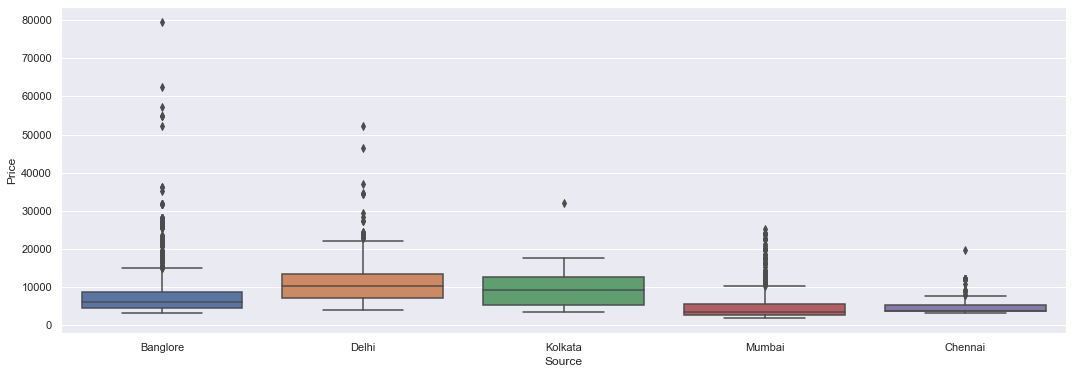

In [23]:
plt.figure(figsize=(18,6))
sns.boxplot(y = "Price", x = "Source", data=train_data.sort_values("Price", ascending = False))
plt.show()

In [24]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source) #without dropping the first column
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [25]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

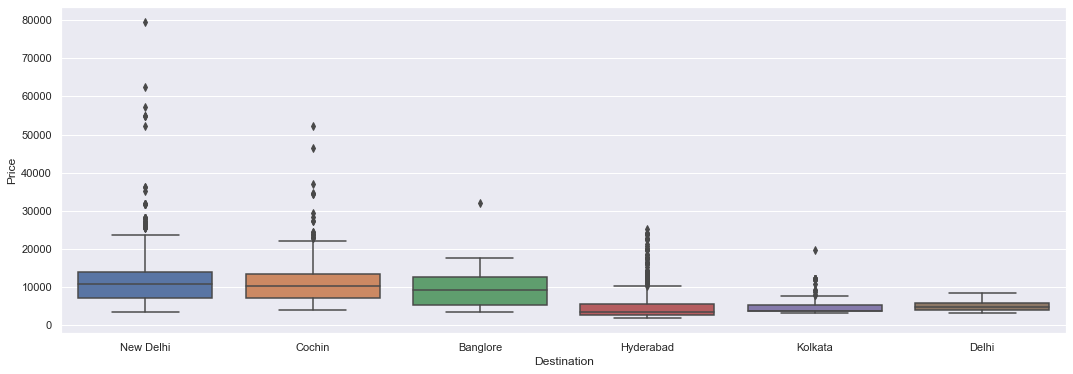

In [26]:
plt.figure(figsize=(18,6))
sns.boxplot(y = "Price", x = "Destination", data=train_data.sort_values("Price", ascending = False))
plt.show()

In [27]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination) #without dropping the first column
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [28]:
train_data.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [29]:
train_data.drop(["Route", "Additional_Info"], axis=1, inplace = True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_in_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,Sunday,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,Wednesday,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,Sunday,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,Sunday,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,Friday,16,50,21,35,285


In [30]:
Weekday = train_data[['Journey_Day']]
Weekday = pd.get_dummies(Weekday) #without dropping the first column
Weekday.head()

,Journey_Day_Friday,Journey_Day_Monday,Journey_Day_Saturday,Journey_Day_Sunday,Journey_Day_Thursday,Journey_Day_Tuesday,Journey_Day_Wednesday
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0


In [31]:
train_data = pd.concat([train_data, Airline, Source, Destination, Weekday], axis=1)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_in_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day_Friday,Journey_Day_Monday,Journey_Day_Saturday,Journey_Day_Sunday,Journey_Day_Thursday,Journey_Day_Tuesday,Journey_Day_Wednesday
0,IndiGo,Banglore,New Delhi,0,3897,24,3,Sunday,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,Wednesday,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,Jet Airways,Delhi,Cochin,2,13882,9,6,Sunday,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,Sunday,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,Friday,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [32]:
train_data.drop(['Airline', 'Source', 'Destination', 'Journey_Day'], axis= 1, inplace= True)
train_data.head()

,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_in_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day_Friday,Journey_Day_Monday,Journey_Day_Saturday,Journey_Day_Sunday,Journey_Day_Thursday,Journey_Day_Tuesday,Journey_Day_Wednesday
0,0,3897,24,3,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,2,7662,1,5,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,2,13882,9,6,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,1,13302,1,3,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [33]:
train_data.shape

(10682, 38)

# Test Set

In [35]:
test_data=pd.read_excel("Test_set.xlsx")
pd.set_option('display.max_columns', None)
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [36]:
print('Test data info')
print('#'*50)
print(test_data.info())

print('NULL values :')
print('#'*50)

test_data.dropna(inplace=True)
print(test_data.isnull().sum())

# EDA

test_data['Journey_Date']= pd.to_datetime(test_data.Date_of_Journey, format ="%d/%m/%Y").dt.day
test_data['Journey_Month']= pd.to_datetime(test_data.Date_of_Journey, format ="%d/%m/%Y").dt.month
test_data['Journey_Day'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.day_name()

test_data.drop(['Date_of_Journey'], axis=1, inplace=True)

# Extracting Departure Hours
test_data['Dep_Hour']= pd.to_datetime(test_data.Dep_Time).dt.hour

# Extracting Departure Minutes
test_data['Dep_Min']= pd.to_datetime(test_data.Dep_Time).dt.minute

# Dropping Dep_Time
test_data.drop(['Dep_Time'], axis = 1, inplace = True)

# Extracting Arrival Hours
test_data['Arr_Hour']= pd.to_datetime(test_data.Arrival_Time).dt.hour

# Extracting Arrival Minute
test_data['Arr_Min']= pd.to_datetime(test_data.Arrival_Time).dt.minute

# Dropping Arrival_Time
test_data.drop(['Arrival_Time'], axis = 1, inplace = True)

test_data["Duration_in_mins"]= test_data.Duration.apply(duration_to_mins)
test_data.drop(['Duration'], axis= 1, inplace= True)


# Handling categotical data

test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)

Source = test_data[['Source']]
Source = pd.get_dummies(Source)

Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination)

Weekday = test_data[['Journey_Day']]
Weekday = pd.get_dummies(Weekday)

test_data = pd.concat([test_data, Airline, Source, Destination, Weekday], axis=1)

test_data.drop(['Route', 'Additional_Info','Airline', 'Source', 'Destination', 'Journey_Day'], axis=1, inplace = True)

print(test_data.shape)


Test data info
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
NULL values :
##################################################
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_

In [37]:
test_data.head()

,Total_Stops,Journey_Date,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_in_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day_Friday,Journey_Day_Monday,Journey_Day_Saturday,Journey_Day_Sunday,Journey_Day_Thursday,Journey_Day_Tuesday,Journey_Day_Wednesday
0,1,6,6,17,30,4,25,655,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,12,5,6,20,10,20,240,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1,21,5,19,15,19,0,1425,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,1,21,5,8,0,21,0,780,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,24,6,23,55,2,45,170,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


# Feature Selection

In [38]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_Date', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arr_Hour', 'Arr_Min', 'Duration_in_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Journey_Day_Friday', 'Journey_Day_Monday',
       'Journey_Day_Saturday', 'Journey_Day_Sunday', 'Journey_Day_Thursday',
       'Journey_Day_Tuesday', 'Journey_Day_Wednesday'],
      dtype='object')

In [39]:
X = train_data.loc[:, ['Total_Stops', 'Journey_Date', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arr_Hour', 'Arr_Min', 'Duration_in_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Journey_Day_Friday', 'Journey_Day_Monday',
       'Journey_Day_Saturday', 'Journey_Day_Sunday', 'Journey_Day_Thursday',
       'Journey_Day_Tuesday', 'Journey_Day_Wednesday']]
X.head()

,Total_Stops,Journey_Date,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_in_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day_Friday,Journey_Day_Monday,Journey_Day_Saturday,Journey_Day_Sunday,Journey_Day_Thursday,Journey_Day_Tuesday,Journey_Day_Wednesday
0,0,24,3,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,2,1,5,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,2,9,6,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1,12,5,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,1,1,3,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [40]:
y = train_data.loc[:, 'Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

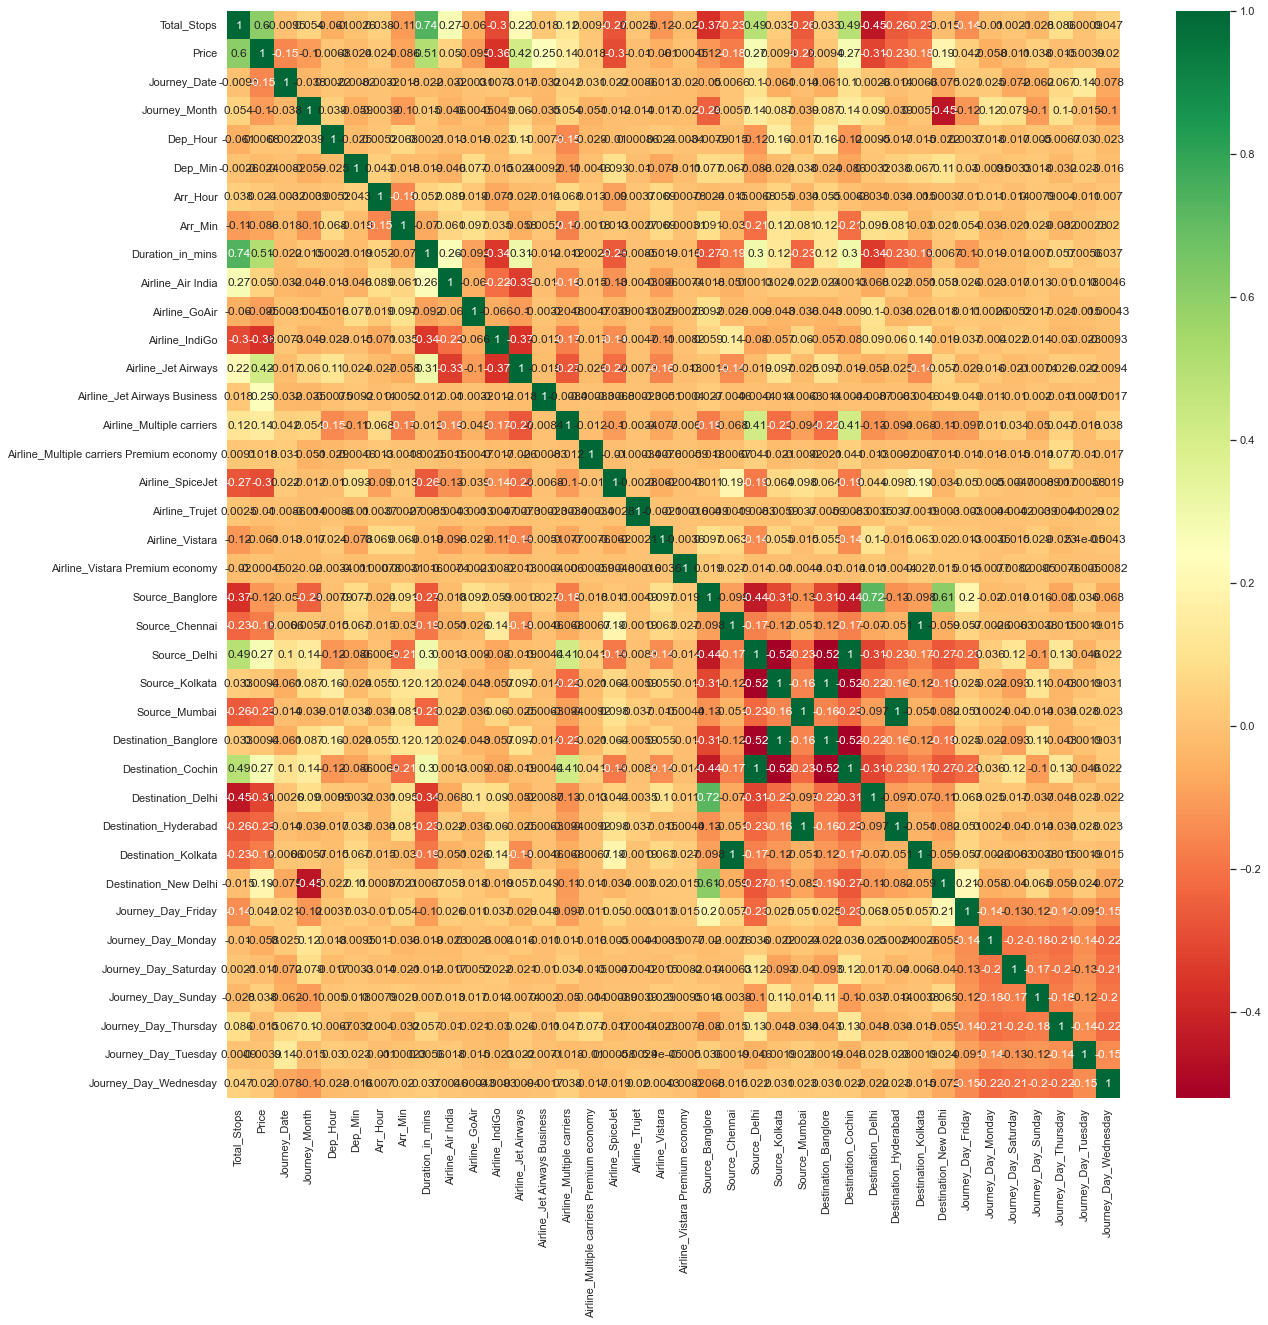

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),annot = True, cmap = "RdYlGn")
plt.show()

In [42]:
# important feature using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [43]:
print(selection.feature_importances_)

[2.01859375e-01 8.96017367e-02 5.18402388e-02 2.66621372e-02
 2.52387480e-02 3.05329746e-02 2.27529675e-02 1.37440061e-01
 1.07837489e-02 1.98564354e-03 1.77227357e-02 1.44598729e-01
 6.81478907e-02 1.99301588e-02 8.84490224e-04 2.81451209e-03
 1.08729569e-04 5.02889924e-03 6.75613164e-05 3.91654129e-03
 4.39001423e-04 1.35733390e-02 3.04422893e-03 7.07020890e-03
 3.95651247e-03 1.24186733e-02 1.90186177e-02 5.41088475e-03
 4.57980818e-04 1.38845300e-02 2.80024399e-02 5.51212802e-03
 3.81328939e-03 5.62071727e-03 5.13289810e-03 3.20957023e-03
 7.51710074e-03]


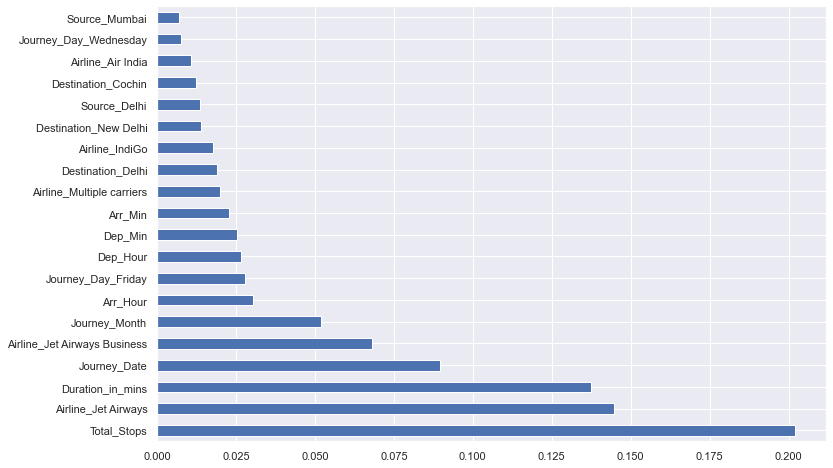

In [44]:
plt.figure(figsize=(12,8))
feat = pd.Series(selection.feature_importances_, index=X.columns)
feat.nlargest(20).plot(kind= 'barh')
plt.show()

Model Fitting

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=27)

In [46]:
# Linear Regression
from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()
print(reg_lin)

reg_lin.fit(X_train, y_train)
# print(reg_lin.intercept_)
# print(reg_lin.coef_)

y_LR_pred = reg_lin.predict(X_test)

print("Train score", reg_lin.score(X_train, y_train))
print("Test score", reg_lin.score(X_test, y_test))

from sklearn import metrics
print("MSE:", metrics.mean_squared_error(y_test, y_LR_pred,squared=True))
print("RMSE:", metrics.mean_squared_error(y_test, y_LR_pred,squared=False))
print("MAE:", metrics.mean_absolute_error(y_test, y_LR_pred))
print("Rsqr:", metrics.r2_score(y_test, y_LR_pred))

LinearRegression()
Train score 0.6562304156027471
Test score 0.5943470974941626
MSE: 9020586.140674477
RMSE: 3003.429063699437
MAE: 1982.6519052684819
Rsqr: 0.5943470974941626


In [47]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
print(reg_rf)
reg_rf.fit(X_train, y_train)

y_Rf_pred = reg_rf.predict(X_test)

print("Train score", reg_rf.score(X_train, y_train))
print("Test score", reg_rf.score(X_test, y_test))

from sklearn import metrics
print("MSE:", metrics.mean_squared_error(y_test, y_Rf_pred,squared=True))
print("RMSE:", metrics.mean_squared_error(y_test, y_Rf_pred,squared=False))
print("MAE:", metrics.mean_absolute_error(y_test, y_Rf_pred))
print("Rsqr:", metrics.r2_score(y_test, y_Rf_pred))

RandomForestRegressor()
Train score 0.9582395615333951
Test score 0.7864729121293785
MSE: 4748245.304313067
RMSE: 2179.0468797878275
MAE: 1227.5408638592296
Rsqr: 0.7864729121293785


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


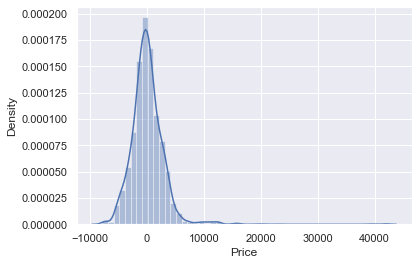

C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


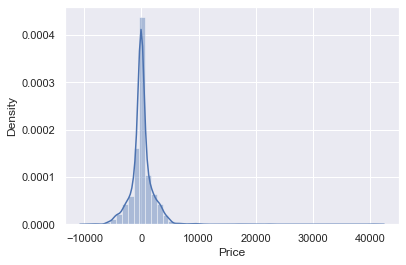

In [48]:
sns.distplot(y_test-y_LR_pred)
plt.show()
sns.distplot(y_test-y_Rf_pred)
plt.show()

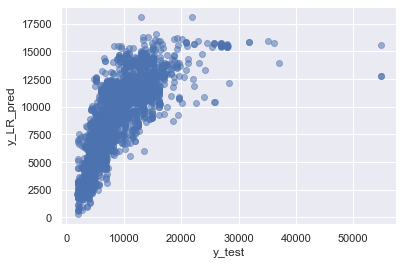

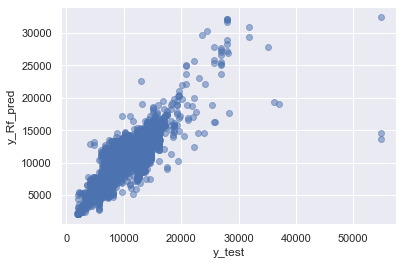

In [49]:
plt.scatter(y_test, y_LR_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_LR_pred")
plt.show()

plt.scatter(y_test, y_Rf_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_Rf_pred")
plt.show()

# HyperParameter Tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
# number of tree in RF
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
#  number of features to consider
max_features = ['auto', 'sqrt']
# max level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# min sample split
min_samples_split = [2, 5, 10, 15, 100]
# min sample leaf node
min_samples_leaf = [1, 2, 5, 10]

In [52]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [53]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [54]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.3s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.3s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.3s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.2s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.3s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   8.6s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   8.4s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   8.3s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   8.5s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   8.5s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  12.8s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  12.9s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  12.6s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  12.7s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  13.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  15.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  16.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   4.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   4.2s
[CV] END max_depth=5, max_feat

C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  17.3s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  17.4s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  16.0s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  17.2s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  17.2s


C:\Users\HappySoul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [56]:
prediction = rf_random.predict(X_test)

<Figure size 576x576 with 0 Axes>

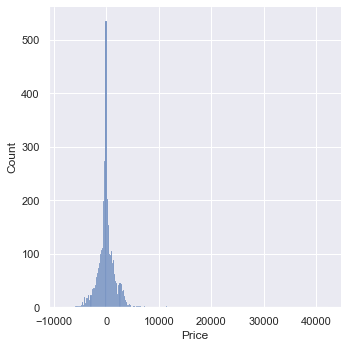

In [57]:
plt.figure(figsize=(8, 8))
sns.displot(y_test-prediction)
plt.show()

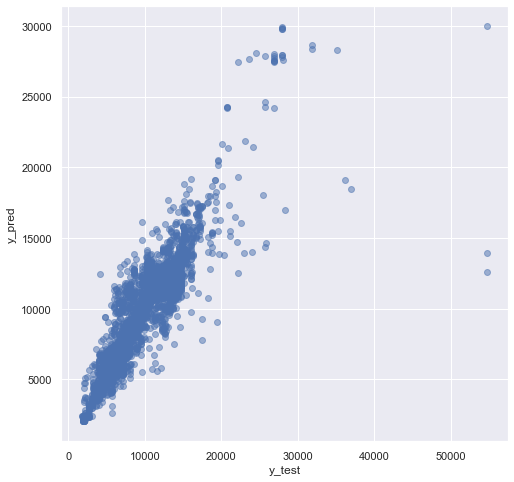

In [58]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, prediction, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('Rsqr:', metrics.r2_score(y_test, prediction))

MAE: 1199.795031465824
MSE: 4419424.752691044
RMSE: 2102.2427910902784
Rsqr: 0.8012598682194705


# Saving

In [60]:
import pickle

file = open('Model_flight.pkl', 'wb')

pickle.dump(rf_random, file)

In [61]:
model = open('Model_flight.pkl', 'rb')
forest = pickle.load(model)


In [62]:
y_prediction = forest.predict(X_test)

In [63]:
metrics.r2_score(y_test, y_prediction)

0.8012598682194705

In [ ]:
"""
s=np.array([0,1,6,18,50,21,30,2,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])
s=s.reshape(1,-1)
print(s)
print(reg_rf.predict(s))
"""